# Task for Forest Cover Classification

# Task 1 Dataset Initialization and Quality Assessment

In [106]:
import pandas as pd
import numpy as np

In [107]:
#shape and display
df = pd.read_csv("forest_cover.csv")
print(df.shape)
df.head(10)

(30860, 56)


Unnamed: 0  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           0     3351.0     NaN   27.0                             726.0   
1           1     2732.0   129.0    7.0                             212.0   
2           2     2572.0    24.0    9.0                             201.0   
3           3     2824.0    69.0   13.0                             417.0   
4           4     2529.0    84.0    5.0                             120.0   
5           5     2050.0   284.0   42.0                               NaN   
6           6     3004.0   236.0    5.0                             960.0   
7           7     3232.0   111.0   10.0                               NaN   
8           8     3141.0   156.0    6.0                             503.0   
9           9        NaN     NaN    NaN                              30.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           124.0                           3813.0   
1                             1.0                           1082.0   
2                           689.0                            957.0   
3                            39.0                           3223.0   
4                             9.0                           1092.0   
5                           141.0                            192.0   
6                            95.0                           5814.0   
7                            78.0                           1342.0   
8                            72.0                              NaN   
9                             3.0                            630.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type36  \
0          192.0           252.0            NaN  ...          NaN   
1          231.0           236.0          137.0  ...          NaN   
2          216.0           222.0            NaN  ...          0.0   
3            NaN           214.0            NaN  ...          0.0   
4            NaN           231.0          139.0  ...          0.0   
5           75.0           201.0          246.0  ...          NaN   
6          211.0           244.0            NaN  ...          0.0   
7            NaN           229.0          122.0  ...          NaN   
8          228.0           241.0          147.0  ...          NaN   
9            NaN           225.0          141.0  ...          NaN   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40    Forest_Cover  Neota  \
0          NaN          NaN          NaN          0.0      Spruce/Fir      0   
1          NaN          NaN          0.0          0.0  Lodgepole Pine      0   
2          NaN          0.0          0.0          0.0  Lodgepole Pine      0   
3          0.0          NaN          0.0          0.0  Lodgepole Pine      0   
4          0.0          NaN          0.0          0.0  Lodgepole Pine      0   
5          NaN          NaN          0.0          NaN  Ponderosa Pine      0   
6          NaN          0.0          0.0          0.0  Lodgepole Pine      0   
7          NaN          1.0          0.0          NaN      Spruce/Fir      0   
8          0.0          NaN          0.0          NaN  Lodgepole Pine      0   
9          NaN          NaN          0.0          NaN  Lodgepole Pine      0   

   Rawah  Comanche Peak  Cache la Poudre  
0      1              0                0  
1      0              1                0  
2      0              1                0  
3      1              0                0  
4      1              0                0  
5      0              0                1  
6      1              0                0  
7      1              0                0  
8      1              0                0  
9      1              0                0  

[10 rows x 56 columns]

In [108]:
#remove unnamed columns
to_drop=[c for c in df.columns if c.lower().startswith("unnamed")]
if to_drop:
    df.drop(columns=to_drop, inplace=True)
print("Dropped columns:", to_drop)

Dropped columns: ['Unnamed: 0']


In [112]:
#data quality summary
def get_data_profile(df: pd.DataFrame) -> pd.DataFrame:
    data_types = df.dtypes.astype(str)
    non_null_count = df.notna().sum()
    missing_count = df.isna().sum()
    missing_percentage = (missing_count / len(df) * 100).round(2)
    unique_count = df.nunique(dropna=True)

    profile_df = pd.DataFrame({
        "Feature": df.columns,
        "Dtype": data_types.values,
        "Non_Null": non_null_count.values,
        "Missing": missing_count.values,
        "Missing_Pct": missing_percentage.values,
        "Unique_Count": unique_count.values
        })
    return profile_df
data_profile = get_data_profile(df)
print(f"data quality summary: {data_profile.shape}")
data_profile

data quality summary: (55, 6)


Feature    Dtype  Non_Null  Missing  \
0                            Elevation  float64     25923     4937   
1                               Aspect  float64     23763     7097   
2                                Slope  float64     28083     2777   
3     Horizontal_Distance_To_Hydrology  float64     28392     2468   
4       Vertical_Distance_To_Hydrology  float64     29009     1851   
5      Horizontal_Distance_To_Roadways  float64     28392     2468   
6                        Hillshade_9am  float64     21602     9258   
7                       Hillshade_Noon  float64     27157     3703   
8                        Hillshade_3pm  float64     22220     8640   
9   Horizontal_Distance_To_Fire_Points  float64     24997     5863   
10                          Soil_Type1  float64     24997     5863   
11                          Soil_Type2  float64     28083     2777   
12                          Soil_Type3  float64     25306     5554   
13                          Soil_Type4  float64     24071     6789   
14                          Soil_Type5  float64     27774     3086   
15                          Soil_Type6  float64     22220     8640   
16                          Soil_Type7    int64     30860        0   
17                          Soil_Type8    int64     30860        0   
18                          Soil_Type9    int64     30860        0   
19                         Soil_Type10    int64     30860        0   
20                         Soil_Type11    int64     30860        0   
21                         Soil_Type12  float64     15122    15738   
22                         Soil_Type13  float64     23145     7715   
23                         Soil_Type14  float64     23145     7715   
24                         Soil_Type15  float64     24380     6480   
25                         Soil_Type16  float64     24688     6172   
26                         Soil_Type17  float64     17899    12961   
27                         Soil_Type18  float64     24688     6172   
28                         Soil_Type19  float64     14196    16664   
29                         Soil_Type20  float64     12344    18516   
30                         Soil_Type21  float64     17899    12961   
31                         Soil_Type22  float64     20985     9875   
32                         Soil_Type23  float64     20059    10801   
33                         Soil_Type24  float64     16356    14504   
34                         Soil_Type25  float64     23145     7715   
35                         Soil_Type26  float64     14813    16047   
36                         Soil_Type27  float64     21911     8949   
37                         Soil_Type28  float64     23454     7406   
38                         Soil_Type29  float64     12653    18207   
39                         Soil_Type30  float64     14505    16355   
40                         Soil_Type31  float64     12962    17898   
41                         Soil_Type32  float64     17591    13269   
42                         Soil_Type33  float64     15122    15738   
43                         Soil_Type34  float64     21294     9566   
44                         Soil_Type35  float64     16356    14504   
45                         Soil_Type36  float64     12962    17898   
46                         Soil_Type37  float64     13270    17590   
47                         Soil_Type38  float64     16665    14195   
48                         Soil_Type39  float64     23145     7715   
49                         Soil_Type40  float64     17591    13269   
50                        Forest_Cover   object     30860        0   
51                               Neota    int64     30860        0   
52                               Rawah    int64     30860        0   
53                       Comanche Peak    int64     30860        0   
54                     Cache la Poudre    int64     30860        0   

    Missing_Pct  Unique_Count  
0          16.0          1568  
1          23.0           363  
2           9.

# Task 2 Data Description

In [71]:
#data cleaning
def quick_clean(df):
    df_cleaned = df.copy()
    redundant_columns = [col for col in df_cleaned.columns 
                        if col.lower().startswith("unnamed")]
    if redundant_columns:
        df_cleaned = df_cleaned.drop(columns=redundant_columns)
    soil_type_features = [col for col in df_cleaned.columns
                         if col.startswith("Soil_Type") or 
                         col in ["Neota", "Rawah", "Comanche_Peak", "Cache_la_Poudre"]]
    for feature in soil_type_features:
        if feature in df_cleaned.columns:
             df_cleaned[feature] = df_cleaned[feature].fillna(0).astype(int)
    target_feature = "Cover_Type"
    if target_feature in df_cleaned.columns:
        df_cleaned[target_feature] = df_cleaned[target_feature].astype("category")
    
    return df_cleaned

In [72]:
df_clean = quick_clean(df)
print("Cleaned dataset dimensions:", df_clean.shape)

Cleaned dataset dimensions: (30860, 55)


In [73]:
df_clean.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3351.0     NaN   27.0                             726.0   
1     2732.0   129.0    7.0                             212.0   
2     2572.0    24.0    9.0                             201.0   
3     2824.0    69.0   13.0                             417.0   
4     2529.0    84.0    5.0                             120.0   
5     2050.0   284.0   42.0                               NaN   
6     3004.0   236.0    5.0                             960.0   
7     3232.0   111.0   10.0                               NaN   
8     3141.0   156.0    6.0                             503.0   
9        NaN     NaN    NaN                              30.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           124.0                           3813.0   
1                             1.0                           1082.0   
2                           689.0                            957.0   
3                            39.0                           3223.0   
4                             9.0                           1092.0   
5                           141.0                            192.0   
6                            95.0                           5814.0   
7                            78.0                           1342.0   
8                            72.0                              NaN   
9                             3.0                            630.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          192.0           252.0            NaN   
1          231.0           236.0          137.0   
2          216.0           222.0            NaN   
3            NaN           214.0            NaN   
4            NaN           231.0          139.0   
5           75.0           201.0          246.0   
6          211.0           244.0            NaN   
7            NaN           229.0          122.0   
8          228.0           241.0          147.0   
9            NaN           225.0          141.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type36  Soil_Type37  \
0                              2271.0  ...            0            0   
1                               912.0  ...            0            0   
2                              2191.0  ...            0            0   
3                              6478.0  ...            0            0   
4                              4983.0  ...            0            0   
5                               255.0  ...            0            0   
6                                 NaN  ...            0            0   
7                              2270.0  ...            0            0   
8                              1354.0  ...            0            0   
9                               300.0  ...            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40    Forest_Cover  Neota  Rawah  \
0            0            0            0      Spruce/Fir      0      1   
1            0            0            0  Lodgepole Pine      0      0   
2            0            0            0  Lodgepole Pine      0      0   
3            0            0            0  Lodgepole Pine      0      1   
4            0            0            0  Lodgepole Pine      0      1   
5            0            0            0  Ponderosa Pine      0      0   
6            0            0            0  Lodgepole Pine      0      1   
7            1            0            0      Spruce/Fir      0      1   
8            0            0            0  Lodgepole Pine      0      1   
9            0            0            0  Lodgepole Pine      0      1   

   Comanche Peak  Cache la Poudre  
0              0                0  
1              1                0  
2              1                0  
3              0                0  
4              0                0  
5              0                1  
6              0                0  
7              0                0  
8              0      

In [74]:
#Data Quality Validation Function
def mark_invalid_as_nan(df):
    data_checked = df.copy()
    data_checked.loc[data_checked['Elevation'] <= 0, 'Elevation'] = np.nan
    data_checked.loc[(data_checked['Slope'] < 0) | (data_checked['Slope'] > 90), 'Slope'] = np.nan
    data_checked.loc[(data_checked['Aspect'] < 0) | (data_checked['Aspect'] > 360), 'Aspect'] = np.nan
    hillshade_columns = [col for col in data_checked.columns if col.startswith("Hillshade")]
    for column in hillshade_columns:
        data_checked.loc[(data_checked[column] < 0) | (data_checked[column] > 255), column] = np.nan
    distance_columns = [col for col in data_checked.columns if col.startswith("Distance")]
    for column in distance_columns:
        data_checked.loc[data_checked[column] < 0, column] = np.nan
    return data_checked

In [75]:
df_checked = mark_invalid_as_nan(df)
invalid_values_count = df_checked.isna().sum() - df.isna().sum()
print("Invalid values replaced with NaN (top 10 columns):")
print(invalid_values_count.sort_values(ascending=False).head(10))
print(f"\nDataset shape after validation: {df_checked.shape}")
print("\nSample of validated data (first 10 rows):")
df_checked.head(10)

Invalid values replaced with NaN (top 10 columns):
Slope             1421
Hillshade_Noon    1350
Aspect            1208
Hillshade_3pm     1143
Hillshade_9am     1081
Elevation          667
Soil_Type24          0
Soil_Type23          0
Soil_Type33          0
Soil_Type25          0
dtype: int64

Dataset shape after validation: (30860, 55)

Sample of validated data (first 10 rows):


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3351.0     NaN   27.0                             726.0   
1     2732.0   129.0    7.0                             212.0   
2     2572.0    24.0    9.0                             201.0   
3     2824.0    69.0   13.0                             417.0   
4     2529.0    84.0    5.0                             120.0   
5     2050.0   284.0   42.0                               NaN   
6     3004.0   236.0    5.0                             960.0   
7     3232.0   111.0   10.0                               NaN   
8     3141.0   156.0    6.0                             503.0   
9        NaN     NaN    NaN                              30.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           124.0                           3813.0   
1                             1.0                           1082.0   
2                           689.0                            957.0   
3                            39.0                           3223.0   
4                             9.0                           1092.0   
5                           141.0                            192.0   
6                            95.0                           5814.0   
7                            78.0                           1342.0   
8                            72.0                              NaN   
9                             3.0                            630.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          192.0           252.0            NaN   
1          231.0           236.0          137.0   
2          216.0           222.0            NaN   
3            NaN           214.0            NaN   
4            NaN           231.0          139.0   
5           75.0           201.0          246.0   
6          211.0           244.0            NaN   
7            NaN           229.0          122.0   
8          228.0           241.0          147.0   
9            NaN           225.0          141.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type36  Soil_Type37  \
0                              2271.0  ...          NaN          NaN   
1                               912.0  ...          NaN          NaN   
2                              2191.0  ...          0.0          NaN   
3                              6478.0  ...          0.0          0.0   
4                              4983.0  ...          0.0          0.0   
5                               255.0  ...          NaN          NaN   
6                                 NaN  ...          0.0          NaN   
7                              2270.0  ...          NaN          NaN   
8                              1354.0  ...          NaN          0.0   
9                               300.0  ...          NaN          NaN   

   Soil_Type38  Soil_Type39  Soil_Type40    Forest_Cover  Neota  Rawah  \
0          NaN          NaN          0.0      Spruce/Fir      0      1   
1          NaN          0.0          0.0  Lodgepole Pine      0      0   
2          0.0          0.0          0.0  Lodgepole Pine      0      0   
3          NaN          0.0          0.0  Lodgepole Pine      0      1   
4          NaN          0.0          0.0  Lodgepole Pine      0      1   
5          NaN          0.0          NaN  Ponderosa Pine      0      0   
6          0.0          0.0          0.0  Lodgepole Pine      0      1   
7          1.0          0.0          NaN      Spruce/Fir      0      1   
8          NaN          0.0          NaN  Lodgepole Pine      0      1   
9          NaN          0.0          NaN  Lodgepole Pine      0      1   

   Comanche Peak  Cache la Poudre  
0              0                0  
1              1                0  
2              1                0  
3              0                0  
4              0                0  
5              0                1  
6              0                0  
7              0                0  
8              0      

In [76]:
data_profile=get_data_profile(df_clean_step1)
data_profile

Feature     Dtype  Non_Null  Missing  \
0                            Elevation   float64     25923     4937   
1                               Aspect   float64     23763     7097   
2                                Slope   float64     28083     2777   
3     Horizontal_Distance_To_Hydrology   float64     28392     2468   
4       Vertical_Distance_To_Hydrology   float64     29009     1851   
5      Horizontal_Distance_To_Roadways   float64     28392     2468   
6                        Hillshade_9am   float64     21602     9258   
7                       Hillshade_Noon   float64     27157     3703   
8                        Hillshade_3pm   float64     22220     8640   
9   Horizontal_Distance_To_Fire_Points   float64     24997     5863   
10                          Soil_Type1   float64     30860        0   
11                          Soil_Type2   float64     30860        0   
12                          Soil_Type3   float64     30860        0   
13                          Soil_Type4   float64     30860        0   
14                          Soil_Type5   float64     30860        0   
15                          Soil_Type6   float64     30860        0   
16                          Soil_Type7     int64     30860        0   
17                          Soil_Type8     int64     30860        0   
18                          Soil_Type9     int64     30860        0   
19                         Soil_Type10     int64     30860        0   
20                         Soil_Type11     int64     30860        0   
21                         Soil_Type12   float64     30860        0   
22                         Soil_Type13   float64     30860        0   
23                         Soil_Type14   float64     30860        0   
24                         Soil_Type15   float64     30860        0   
25                         Soil_Type16   float64     30860        0   
26                         Soil_Type17   float64     30860        0   
27                         Soil_Type18   float64     30860        0   
28                         Soil_Type19   float64     30860        0   
29                         Soil_Type20   float64     30860        0   
30                         Soil_Type21   float64     30860        0   
31                         Soil_Type22   float64     30860        0   
32                         Soil_Type23   float64     30860        0   
33                         Soil_Type24   float64     30860        0   
34                         Soil_Type25   float64     30860        0   
35                         Soil_Type26   float64     30860        0   
36                         Soil_Type27   float64     30860        0   
37                         Soil_Type28   float64     30860        0   
38                         Soil_Type29   float64     30860        0   
39                         Soil_Type30   float64     30860        0   
40                         Soil_Type31   float64     30860        0   
41                         Soil_Type32   float64     30860        0   
42                         Soil_Type33   float64     30860        0   
43                         Soil_Type34   float64     30860        0   
44                         Soil_Type35   float64     30860        0   
45                         Soil_Type36   float64     30860        0   
46                         Soil_Type37   float64     30860        0   
47                         Soil_Type38   float64     30860        0   
48                         Soil_Type39   float64     30860        0   
49                         Soil_Type40   float64     30860        0   
50                        Forest_Cover  category     30860        0   
51                               Neota     int64     30860        0   
52                               Rawah     int64     30860        0   
53                       Comanche Peak     int64     30860        0   
54                     Cache la Poudre     int64     30860        0   

    Missing_Pct  Unique_Count  
0          16.0       

# Task 3 Exploratory Data Analysis and Feature Distribution Visualization

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

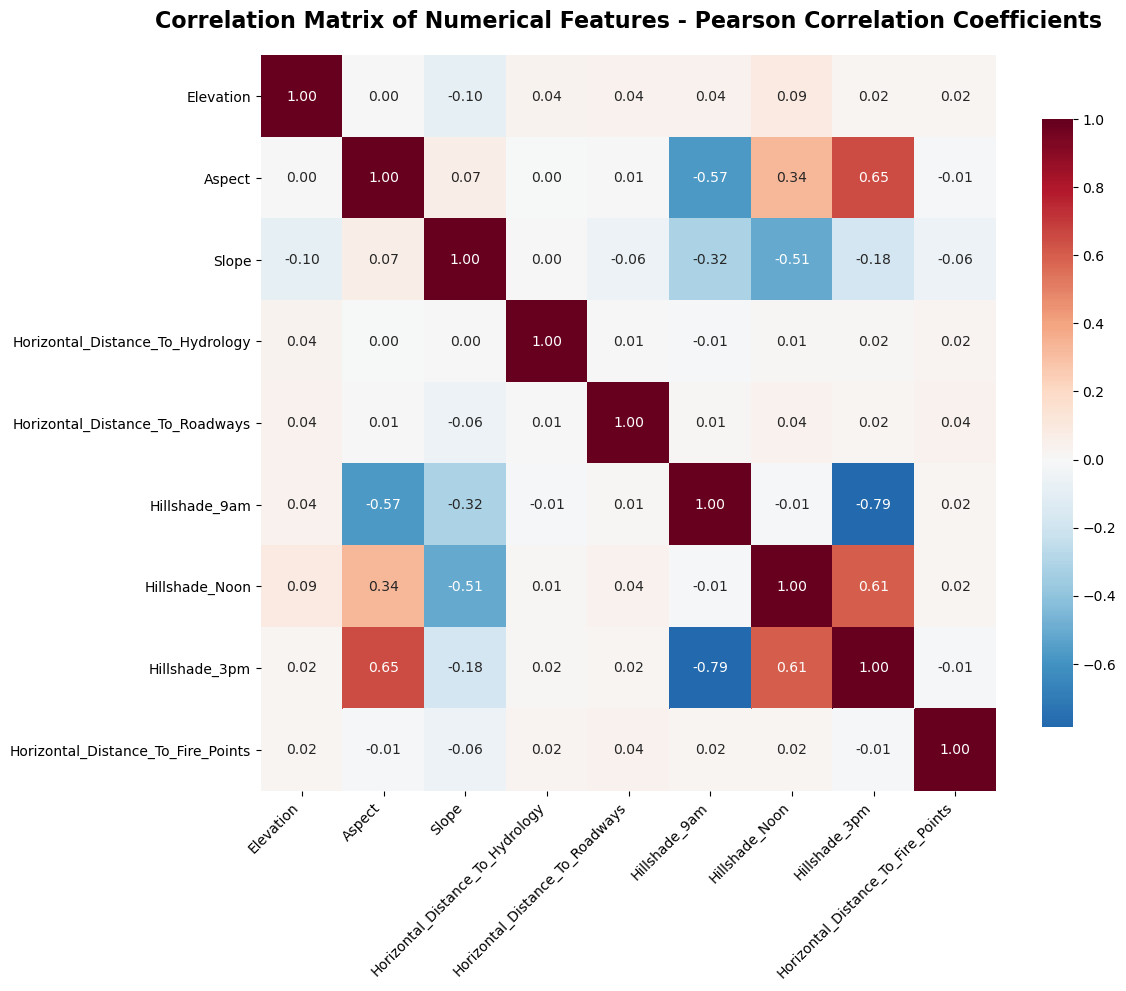

In [97]:
#Correlation Heatmap
selected_features = [
    "Elevation", "Aspect", "Slope", 
    "Horizontal_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
correlation_matrix = df_checked[selected_features].corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0, 
            fmt=".2f", square=True, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title("Correlation Matrix of Numerical Features - Pearson Correlation Coefficients", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [98]:
plt.style.use('default')
sns.set_palette("husl")

In [99]:
#Statistical Summary Calculation for Numerical Features
features_to_analyze = ["Elevation", "Slope"]
for feature in features_to_analyze:
    feature_data = df_checked[feature].dropna()

    mean_value = feature_data.mean()
    median_value = feature_data.median()
    variance_value = feature_data.var()
    print(f"{feature} Statistical Summary")
    print("=" * 40)
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Variance: {variance_value:.2f}")
    print()

Elevation Statistical Summary
Mean: 3051.50
Median: 3004.00
Variance: 401961.07

Slope Statistical Summary
Mean: 14.11
Median: 13.00
Variance: 56.07



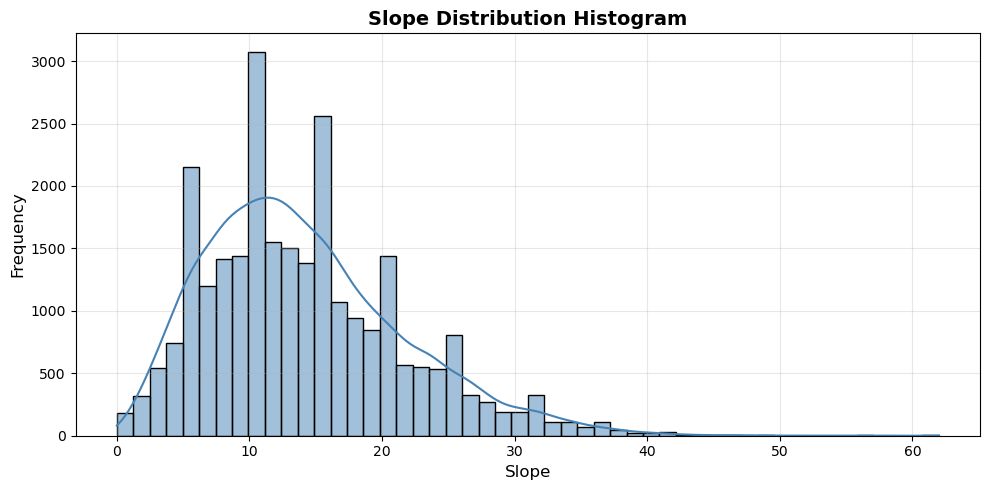

In [100]:
#Distribution Visualization with Histogram and KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(feature_data, bins=50, kde=True, color='steelblue')
plt.title(f"{feature} Distribution Histogram", fontsize=14, fontweight='bold')
plt.xlabel(feature, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

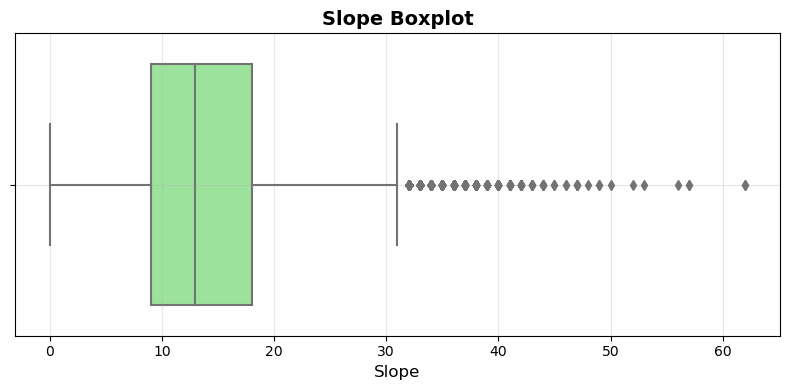

In [101]:
#Boxplot Visualization for Statistical Distribution Analysis
plt.figure(figsize=(8, 4))
sns.boxplot(x=feature_data, color='lightgreen')
plt.title(f"{feature} Boxplot", fontsize=14, fontweight='bold')
plt.xlabel(feature, fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

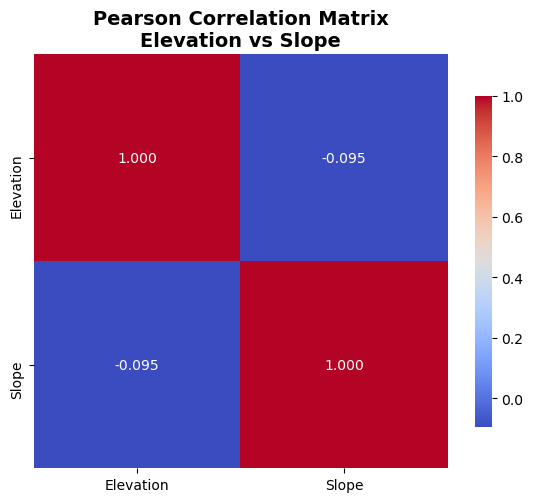

In [102]:
#Pearson Correlation Matrix Heatmap Visualization
selected_features = ["Elevation", "Slope"]
pearson_corr = df_checked[selected_features].corr(method="pearson")
plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".3f", 
            square=True, cbar_kws={"shrink": 0.8})
plt.title("Pearson Correlation Matrix\nElevation vs Slope", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

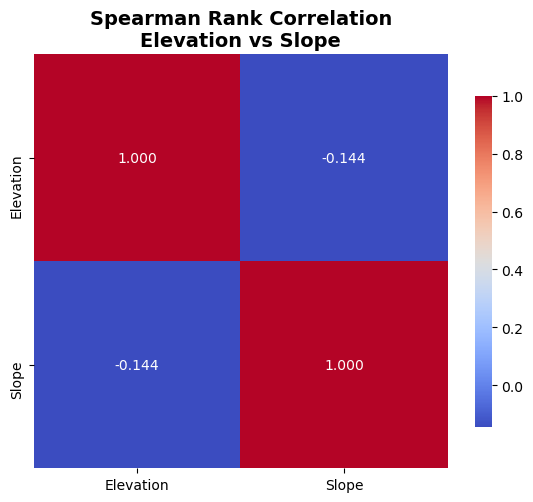

In [103]:
#Spearman Rank Correlation Matrix Heatmap Visualization
spearman_corr = df_checked[selected_features].corr(method="spearman")
plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".3f",
            square=True, cbar_kws={"shrink": 0.8})
plt.title("Spearman Rank Correlation\nElevation vs Slope", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [113]:
import scipy.stats as stats
#Frequency and Proportion Distribution Analysis for Forest Cover Types
print("Forest_Cover frequency distribution:")
fc_counts = df_checked["Forest_Cover"].value_counts(dropna=False).sort_index()
print(fc_counts)

print("\nForest_Cover proportion distribution:")
fc_props = df_checked["Forest_Cover"].value_counts(normalize=True, dropna=False).sort_index().round(3)
print(fc_props)

Forest_Cover frequency distribution:
Aspen                  489
Cottonwood/Willow      141
Douglas-fir            939
Krummholz             1060
Lodgepole Pine       14945
Ponderosa Pine        1895
Spruce/Fir           11391
Name: Forest_Cover, dtype: int64

Forest_Cover proportion distribution:
Aspen                0.016
Cottonwood/Willow    0.005
Douglas-fir          0.030
Krummholz            0.034
Lodgepole Pine       0.484
Ponderosa Pine       0.061
Spruce/Fir           0.369
Name: Forest_Cover, dtype: float64


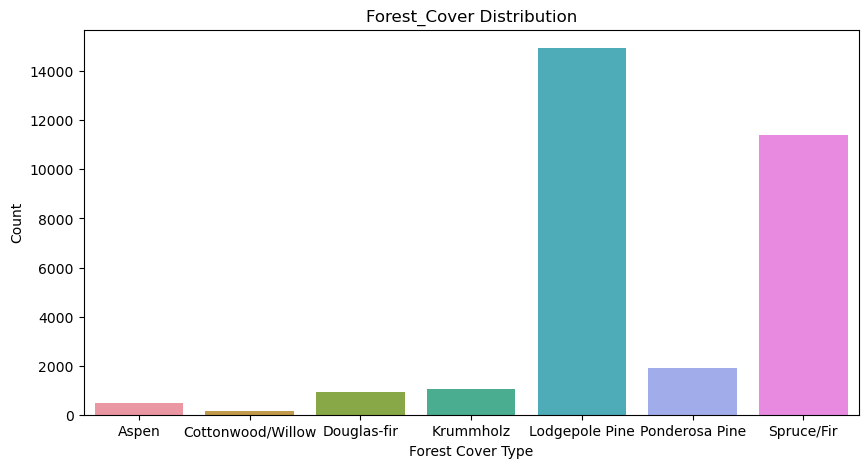

<ipython-input-116-8fadcde715dd>:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(fc_props.values, labels=fc_props.index, autopct='%1.1f%%', startangle=90)


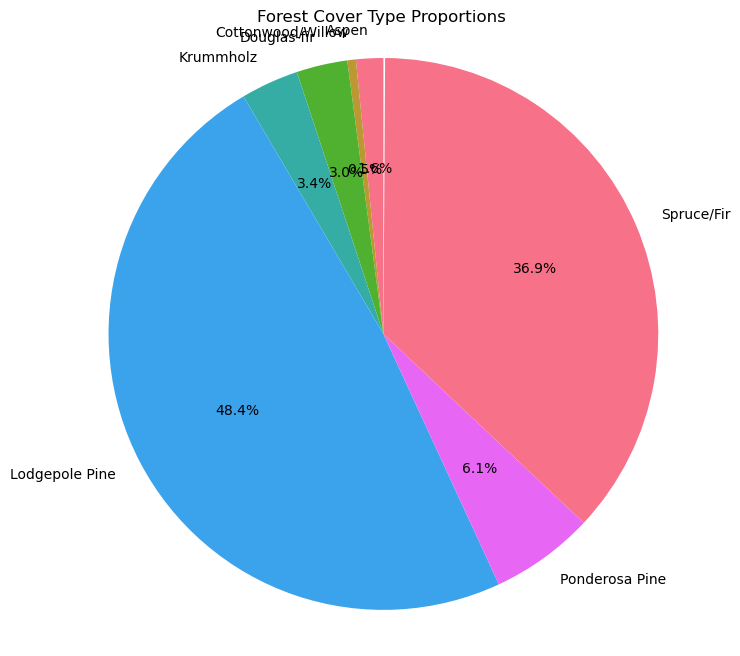

In [116]:
#Comprehensive Categorical Data Visualization and Statistical Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x="Forest_Cover", data=df_checked, order=fc_counts.index)
plt.title("Forest_Cover Distribution")
plt.xlabel("Forest Cover Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(fc_props.values, labels=fc_props.index, autopct='%1.1f%%', startangle=90)
plt.title("Forest Cover Type Proportions")
plt.axis('equal')
plt.show()

if "Soil_cat" in df_checked.columns:
    print("\nSoil Category frequency (top 15):")
    soil_counts = df_checked["Soil_cat"].value_counts(dropna=False).head(15)
    print(soil_counts)
    
    print("\nSoil Category proportions (top 15):")
    soil_props = df_checked["Soil_cat"].value_counts(normalize=True, dropna=False).head(15).round(3)
    print(soil_props)

    plt.figure(figsize=(12, 8))
    sns.countplot(y="Soil_cat", data=df_checked, order=soil_counts.index)
    plt.title("Soil Category Distribution - Top 15")
    plt.xlabel("Count")
    plt.ylabel("Soil Category")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.pie(soil_props.values, labels=soil_props.index, autopct='%1.1f%%', startangle=90)
    plt.title("Soil Category Proportions - Top 15")
    plt.axis('equal')
    plt.show()

    soil_fc_stats = df_checked.groupby("Soil_cat")["Forest_Cover"].agg(['count'])
    print("\nForest Cover count by Soil Category (top 15):")
    print(soil_fc_stats.loc[soil_counts.index].round(0))

    plt.figure(figsize=(14, 8))
    sns.countplot(y="Soil_cat", hue="Forest_Cover", data=df_checked, order=soil_counts.index)
    plt.title("Soil Category vs Forest Cover Type")
    plt.xlabel("Count")
    plt.ylabel("Soil Category")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    soil_fc_dist = df_checked.groupby("Soil_cat")["Forest_Cover"].value_counts(normalize=True).unstack().fillna(0).round(3)
    print("\nForest Cover distribution by Soil Category (top 15):")
    print(soil_fc_dist.loc[soil_counts.index])

    cont_table = pd.crosstab(df_checked["Soil_cat"], df_checked["Forest_Cover"])
    cont_table_top = cont_table.loc[soil_counts.index]
    chi2, p_value, dof, expected = stats.chi2_contingency(cont_table_top)
    
    print(f"\nChi-square test results:")
    print(f"Chi2 statistic: {chi2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("\nContingency table (top 15 soil categories):")
    print(cont_table_top)

    residuals = (cont_table_top - expected) / np.sqrt(expected)
    plt.figure(figsize=(12, 8))
    sns.heatmap(residuals, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
    plt.title("Standardized Residuals - Soil Category vs Forest Cover")
    plt.xlabel("Forest Cover Type")
    plt.ylabel("Soil Category")
    plt.tight_layout()
    plt.show()

In [117]:
# Save the cleaned dataset as CSV file
df_checked.to_csv("forest_cover_cleaned.csv", index=False)
print("Cleaned dataset saved as: forest_cover_cleaned.csv")
print(f"Dataset shape: {df_checked.shape}")
print(f"Total records: {len(df_checked)}")
print(f"Number of features: {len(df_checked.columns)}")

Cleaned dataset saved as: forest_cover_cleaned.csv
Dataset shape: (30860, 55)
Total records: 30860
Number of features: 55
